### Trenowanie modelu

Utworzono funkcję `train_model`, która przyjmuje jako argumenty:
- **data_path** - ścieżka do pliku z danymi
- **X** - lista cech do trenowania modelu
- **y** - nazwa celu
- **model** - model do trenowania

Funkcja wykonuje poniższe kroki:
1. Wczytuje dane z pliku
2. Dzieli dane na zbiór treningowy i testowy
3. Trenuje model na danych treningowych
4. Zwraca wytrenowany model oraz wynik na zbiorze testowym
5. Wyświetla krzywą uczenia


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

def model_training(data_path, X, y, model):
    # load data
    data = pd.read_csv(data_path)

    # split data
    X_data_unprocessed = data[X]
    y_data = data[y]

    #normalize features
    normalizer = StandardScaler()
    X_data = normalizer.fit_transform(X_data_unprocessed)

    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    # train model
    model.fit(X_train, y_train)

    # predict
    y_pred = model.predict(X_test)

    plot_learning_curve(model, X_train, y_train)

    return y_test, y_pred

### Ocena modelu

Ocena modelu odbywa się na podstawie miary `mean_squared_error` - średni błąd kwadratowy. Im mniejsza wartość tym lepszy model.
Możliwe jest również zastosowanie innych miar, jednak w przypadku regresji zdecydowano się na tę miarę.

In [2]:
def model_evaluation(y_test, y_pred):
    # mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

### Wykresy
Zaprezentowano wykres zależności wartości przewidywanej od wartości rzeczywistej. Im bardziej punkty zbliżone są do prostej y=x, tym lepszy model.
Stworzono również wykres krzywej uczenia, która przedstawia wartość funkcji straty w zależności od liczby epok. Im mniejsza wartość tym lepszy model.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(y_test, y_pred):
    
    df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    sns.lmplot(x='Actual', y='Predicted', data=df_plot, aspect=1.5, height=7, ci=None, line_kws={'color': 'red'})
    plt.title('Actual vs Predicted')
    plt.show()

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


def plot_learning_curve(model, x, y):
    train_sizes, train_scores, test_scores, _, _ = learning_curve(model, x, y, cv=30,return_times=True )

    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    



    plt.plot(train_sizes, np.mean(train_scores,axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')

### Test
Przykładowo wytrenowany model.

Mean Squared Error: 24.162210052424378


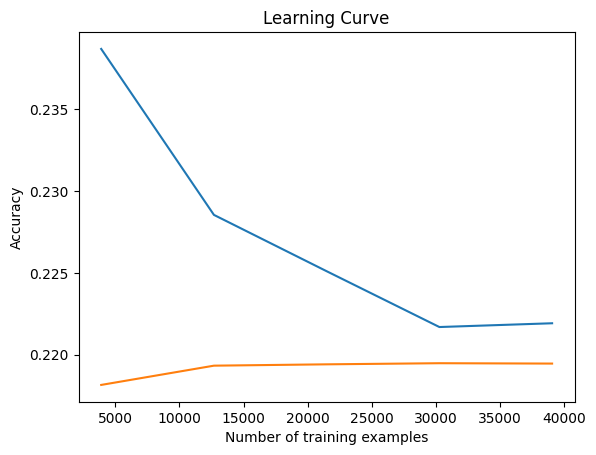

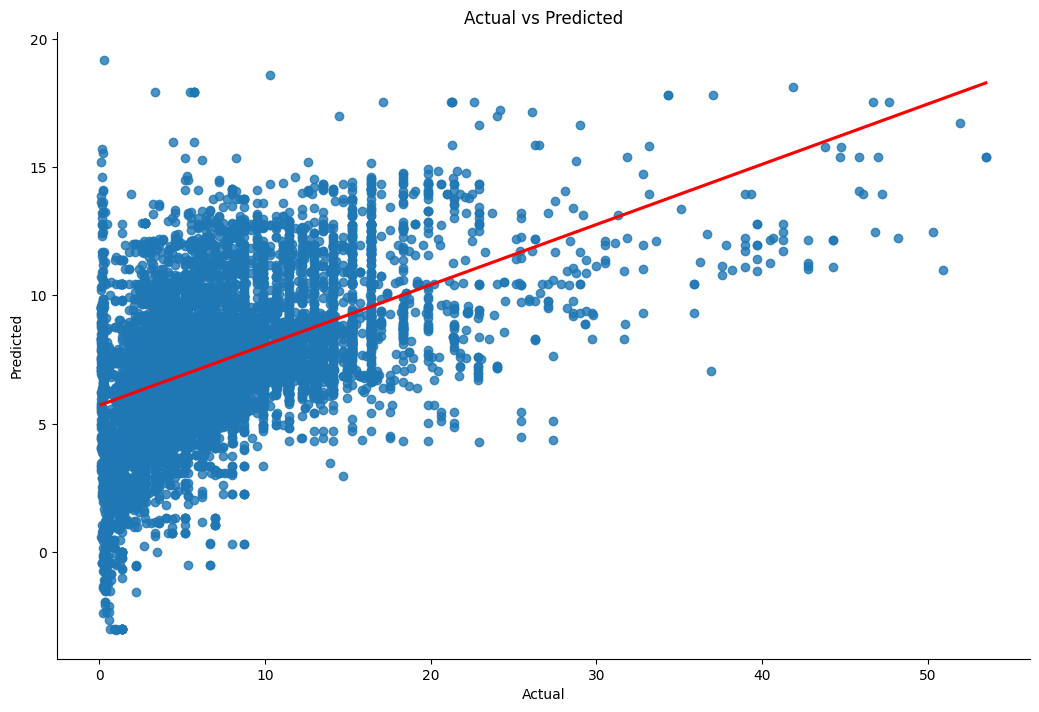

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


DATA_PATH = '../Campaign3/o2_download_nexus5x.csv'
X = ['rsrp', 'rsrq', 'cqi', 'longitude', 'latitude', 'speed']
y = 'throughput'

model = LinearRegression()
y_test, y_pred = model_training(DATA_PATH, X, y, model)

model_evaluation(y_test, y_pred)

plot_results(y_test, y_pred)

